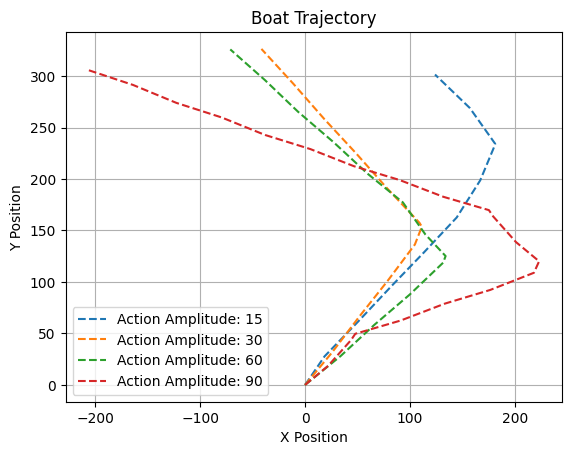

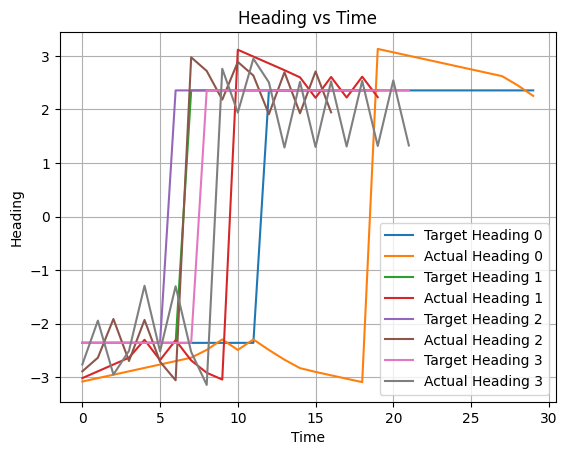

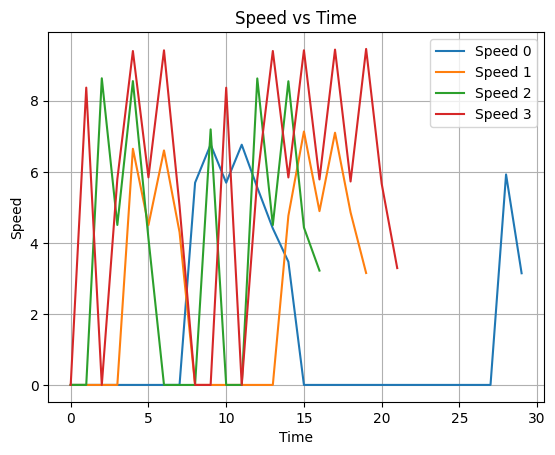

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from boat_simulation import Boat
# Simulation setup


# for inertia_factor in [0, 0.3, 0.9]:
target_heading_initial = np.pi / 4
target_heading_final = 2*np.pi - np.pi / 4

wind_speed = 6.17  # m/s = 12kts
wind_angle = 0  # radians

def angle_difference(angle1, angle2):
    # Normalize angles to [0, 2*pi)
    angle1 = angle1 % (2 * np.pi)
    angle2 = angle2 % (2 * np.pi)

    # Compute the difference
    diff = angle2 - angle1

    # Adjust differences larger than pi to find the shortest path
    if diff > np.pi:
        diff -= 2 * np.pi
    elif diff < -np.pi:
        diff += 2 * np.pi

    return diff

# Simulation loop
headings = []
speeds = []

for action_amplitude in [15, 30, 60, 90]:
    target_heading = target_heading_initial
    trajectory = []
    headings.append([])
    speeds.append([])
    boat = Boat(mass=960+320, drag_coefficient=0.003, sail_area=67+25)
    for timestep in range(1000):
        if boat.y >= 100:
            target_heading = target_heading_final

        sign = np.sign(angle_difference(boat.heading, target_heading))
        action = sign * action_amplitude / 180 * np.pi
        boat.step(wind_speed, wind_angle, action, 15)

        trajectory.append([boat.x, boat.y])
        headings[-1].append([target_heading, boat.heading, action])
        speeds[-1].append([boat.speed])

        if boat.y > 300:
            break

    # Plotting the trajectory
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], '--', label=f'Action Amplitude: {action_amplitude}')

plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Boat Trajectory')
plt.grid(True)
plt.show()

for i, h in enumerate(headings):
    h = np.array(h)
    plt.plot(h[:, 0] - np.pi, label=f'Target Heading {i}')
    plt.plot(h[:, 1] - np.pi, label=f'Actual Heading {i}')
    # plt.plot(h[:, 2], label=f'Rudder Angle {i}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Heading')
plt.title('Heading vs Time')
plt.grid(True)
plt.show()

for i, h in enumerate(speeds):
    h = np.array(h)
    plt.plot(h, label=f'Speed {i}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed vs Time')
plt.grid(True)
plt.show()


In [2]:
boat.mass, boat.length, boat.beam, boat.moment_of_inertia, boat.sail_area, boat.calculate_turning_torque(np.pi, boat.speed)

(800, 7.3, 2.5, 3552.6666666666665, 67, 614.914104009239)